In [1]:
import numpy as np
import pandas as pd
#test
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
allData = pd.read_csv(r"C:\Users\Eric\Documents\EECS 731\Proj5\data\Historical Product Demand.csv")
allData

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [3]:
allData['Product_Code'].value_counts()

Product_1359    16936
Product_1295    10575
Product_1378     9770
Product_0620     9428
Product_1286     8888
                ...  
Product_1698        2
Product_0465        1
Product_1703        1
Product_0853        1
Product_2099        1
Name: Product_Code, Length: 2160, dtype: int64

In [4]:
OneProduct = allData

In [5]:
#Attempt 1 at filter out all product_codes except 1359
OneProduct = OneProduct[(OneProduct.Product_Code == 'Product_1359')]
OneProduct

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
276,Product_1359,Whse_J,Category_019,2012/4/18,80000
282,Product_1359,Whse_J,Category_019,2012/5/21,70000
289,Product_1359,Whse_J,Category_019,2012/6/26,80000
292,Product_1359,Whse_J,Category_019,2012/7/17,100000
296,Product_1359,Whse_J,Category_019,2012/8/24,100000
...,...,...,...,...,...
1046514,Product_1359,Whse_J,Category_019,2016/10/3,20000
1046515,Product_1359,Whse_J,Category_019,2016/9/16,10000
1046516,Product_1359,Whse_J,Category_019,2016/11/1,30000
1046517,Product_1359,Whse_J,Category_019,2016/12/1,20000


In [6]:
#attempt 2, matches attempt 1
filter = OneProduct['Product_Code'].str.contains("Product_1359")
OneProduct = OneProduct[filter]
OneProduct

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
276,Product_1359,Whse_J,Category_019,2012/4/18,80000
282,Product_1359,Whse_J,Category_019,2012/5/21,70000
289,Product_1359,Whse_J,Category_019,2012/6/26,80000
292,Product_1359,Whse_J,Category_019,2012/7/17,100000
296,Product_1359,Whse_J,Category_019,2012/8/24,100000
...,...,...,...,...,...
1046514,Product_1359,Whse_J,Category_019,2016/10/3,20000
1046515,Product_1359,Whse_J,Category_019,2016/9/16,10000
1046516,Product_1359,Whse_J,Category_019,2016/11/1,30000
1046517,Product_1359,Whse_J,Category_019,2016/12/1,20000


In [7]:
#Remove columns per report
del OneProduct['Warehouse']

In [8]:
# where are the values missing
print("*****In the MLBElo set*****")
print(OneProduct.isna().sum())

*****In the MLBElo set*****
Product_Code        0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64


In [9]:
# See types of features
OneProduct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16936 entries, 276 to 1046518
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Code      16936 non-null  object
 1   Product_Category  16936 non-null  object
 2   Date              16936 non-null  object
 3   Order_Demand      16936 non-null  object
dtypes: object(4)
memory usage: 661.6+ KB


In [10]:
#Attempt at making date a proper datatype
#OneProduct['Date'] = pd.to_datetime(OneProduct['Date'])

In [11]:
def calculate_date(row):
    return pd.to_datetime(row['Date'])

OneProduct.apply(calculate_date, axis=1)

276       2012-04-18
282       2012-05-21
289       2012-06-26
292       2012-07-17
296       2012-08-24
             ...    
1046514   2016-10-03
1046515   2016-09-16
1046516   2016-11-01
1046517   2016-12-01
1046518   2016-12-09
Length: 16936, dtype: datetime64[ns]

In [12]:
OneProduct['Date'] = OneProduct.apply(calculate_date, axis=1)
OneProduct

,Product_Code,Product_Category,Date,Order_Demand
276,Product_1359,Category_019,2012-04-18,80000
282,Product_1359,Category_019,2012-05-21,70000
289,Product_1359,Category_019,2012-06-26,80000
292,Product_1359,Category_019,2012-07-17,100000
296,Product_1359,Category_019,2012-08-24,100000
...,...,...,...,...
1046514,Product_1359,Category_019,2016-10-03,20000
1046515,Product_1359,Category_019,2016-09-16,10000
1046516,Product_1359,Category_019,2016-11-01,30000
1046517,Product_1359,Category_019,2016-12-01,20000


In [13]:
OneProduct['Order_Demand'].astype(str).str.extract(r'([0-9]+)').astype(int)

,0
276,80000
282,70000
289,80000
292,100000
296,100000
...,...
1046514,20000
1046515,10000
1046516,30000
1046517,20000


In [14]:
OneProduct['Order_Demand'] = OneProduct['Order_Demand'].replace('\D', '', regex=True).astype(int)

In [15]:
OneProduct

,Product_Code,Product_Category,Date,Order_Demand
276,Product_1359,Category_019,2012-04-18,80000
282,Product_1359,Category_019,2012-05-21,70000
289,Product_1359,Category_019,2012-06-26,80000
292,Product_1359,Category_019,2012-07-17,100000
296,Product_1359,Category_019,2012-08-24,100000
...,...,...,...,...
1046514,Product_1359,Category_019,2016-10-03,20000
1046515,Product_1359,Category_019,2016-09-16,10000
1046516,Product_1359,Category_019,2016-11-01,30000
1046517,Product_1359,Category_019,2016-12-01,20000


In [16]:
OneProduct.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16936 entries, 276 to 1046518
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product_Code      16936 non-null  object        
 1   Product_Category  16936 non-null  object        
 2   Date              16936 non-null  datetime64[ns]
 3   Order_Demand      16936 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 595.4+ KB


In [17]:
#Drop product code and category, unneeded
#Remove columns per report
del OneProduct['Product_Code']
del OneProduct['Product_Category']


In [18]:
#Date to number
from matplotlib.dates import date2num       #-->Update
OneProduct['Date'] = OneProduct['Date'].apply(date2num)      #-->Update

In [19]:
#Attempt 1: Linear Regression!

# From: https://www.wintellect.com/creating-a-simple-linear-regression-machine-learning-model-with-scikit-learn/
#Make train/test data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(OneProduct, test_size=0.2, random_state=42)
train_set_copy = train_set.copy()

In [20]:
#Exploratory Data Analysis
train_set_copy.describe()

,Date,Order_Demand
count,13548.000000,1.354800e+04
mean,735363.197815,2.802081e+04
std,520.709726,7.084522e+04
min,734507.000000,0.000000e+00
25%,734917.000000,3.000000e+03
50%,735334.000000,1.000000e+04
75%,735793.000000,2.500000e+04
max,736326.000000,2.000000e+06


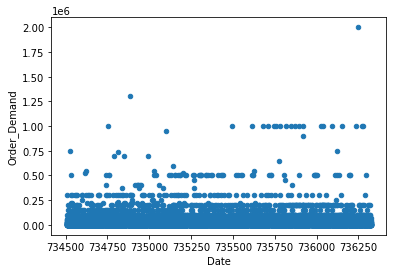

In [21]:
#Simple scatter plot example
train_set_copy.plot.scatter(x='Date', y='Order_Demand')

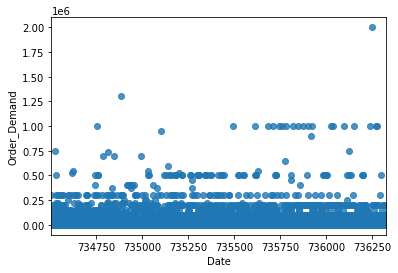

In [22]:
import seaborn as sns
# Regression plot
sns.regplot('Date', # Horizontal axis
           'Order_Demand', # Vertical axis
           data=train_set_copy)

In [23]:
#Building the Model
train_set_full = train_set.copy()

train_set = train_set.drop(["Order_Demand"], axis=1)

test_set_full = test_set.copy()

test_set = test_set.drop(["Order_Demand"], axis=1)

In [24]:
from sklearn.linear_model import LinearRegression
train_labels = train_set_copy["Order_Demand"]
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)

LinearRegression()

In [25]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [3.08792527]
Intercept:  -2242725.785491728


In [26]:
#prediction from an input
order_pred = lin_reg.predict(test_set)
order_pred

array([27075.29890965, 28461.7773554 , 25917.32693381, ...,
       28572.94266508, 27211.16762149, 26825.17696287])

In [27]:
#compare the predictions to the test set [score1]
print(order_pred)
print(test_set_full["Order_Demand"])

[27075.29890965 28461.7773554  25917.32693381 ... 28572.94266508
 27211.16762149 26825.17696287]
207890    12000
469815     5000
47350     40000
662740     1000
453747     2000
          ...  
893451     4000
49951      5000
469849     2000
256478    10000
227784     1000
Name: Order_Demand, Length: 3388, dtype: int32


In [28]:
#calculates the coefficient of determination or the r^2 of the model
from sklearn.metrics import r2_score
r2_score(test_set_full["Order_Demand"], order_pred)

0.00016782928747915982

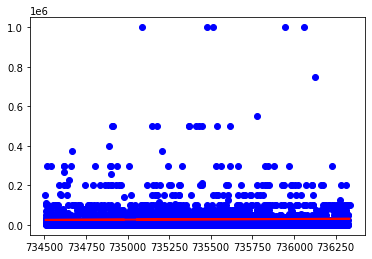

In [29]:
import matplotlib.pyplot as plt
plt.scatter(test_set_full["Date"], test_set_full["Order_Demand"],  color='blue')
plt.plot(test_set_full["Date"], order_pred, color='red', linewidth=2)

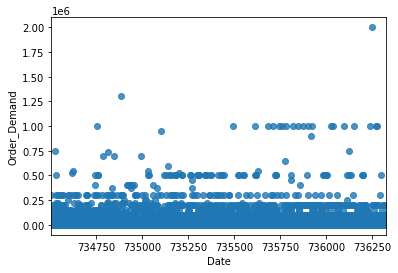

In [30]:
#Attempt 2
import seaborn as sns
# Regression plot
sns.regplot('Date', # Horizontal axis
           'Order_Demand', # Vertical axis
           data=train_set_copy)

In [31]:
#Remake the data
OneProduct2 = allData

In [32]:
#Attempt 1 at filter out all product_codes except 1359
OneProduct2 = OneProduct2[(OneProduct2.Product_Code == 'Product_1359')]
OneProduct2

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
276,Product_1359,Whse_J,Category_019,2012/4/18,80000
282,Product_1359,Whse_J,Category_019,2012/5/21,70000
289,Product_1359,Whse_J,Category_019,2012/6/26,80000
292,Product_1359,Whse_J,Category_019,2012/7/17,100000
296,Product_1359,Whse_J,Category_019,2012/8/24,100000
...,...,...,...,...,...
1046514,Product_1359,Whse_J,Category_019,2016/10/3,20000
1046515,Product_1359,Whse_J,Category_019,2016/9/16,10000
1046516,Product_1359,Whse_J,Category_019,2016/11/1,30000
1046517,Product_1359,Whse_J,Category_019,2016/12/1,20000


In [33]:
#Remove columns per report
del OneProduct2['Warehouse']
del OneProduct2['Product_Code']
del OneProduct2['Product_Category']

In [34]:
def calculate_date2(row):
    return pd.to_datetime(row['Date'])

OneProduct2.apply(calculate_date2, axis=1)

276       2012-04-18
282       2012-05-21
289       2012-06-26
292       2012-07-17
296       2012-08-24
             ...    
1046514   2016-10-03
1046515   2016-09-16
1046516   2016-11-01
1046517   2016-12-01
1046518   2016-12-09
Length: 16936, dtype: datetime64[ns]

In [35]:
OneProduct2['Date'] = OneProduct2.apply(calculate_date, axis=1)

In [36]:
OneProduct2['Order_Demand'] = OneProduct2['Order_Demand'].replace('\D', '', regex=True).astype(int)

In [37]:
OneProduct2

,Date,Order_Demand
276,2012-04-18,80000
282,2012-05-21,70000
289,2012-06-26,80000
292,2012-07-17,100000
296,2012-08-24,100000
...,...,...
1046514,2016-10-03,20000
1046515,2016-09-16,10000
1046516,2016-11-01,30000
1046517,2016-12-01,20000


In [38]:
OneProduct2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16936 entries, 276 to 1046518
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          16936 non-null  datetime64[ns]
 1   Order_Demand  16936 non-null  int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 330.8 KB


In [39]:
#Let's try ARIMA
#Working from: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [40]:
#convert oneproduct2 dataframe to series
OneProductSeries = OneProduct2
OneProductSeries = pd.Series(OneProductSeries['Order_Demand'], index=OneProductSeries.index)


In [41]:
#data = sm.datasets.co2.load_pandas()

#data.info

In [42]:
y = OneProduct2
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16936 entries, 276 to 1046518
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          16936 non-null  datetime64[ns]
 1   Order_Demand  16936 non-null  int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 330.8 KB


In [43]:
# The 'MS' string groups the data in buckets by start of the month
#y = y['Date'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())



In [44]:
print(y)

              Date  Order_Demand
276     2012-04-18         80000
282     2012-05-21         70000
289     2012-06-26         80000
292     2012-07-17        100000
296     2012-08-24        100000
...            ...           ...
1046514 2016-10-03         20000
1046515 2016-09-16         10000
1046516 2016-11-01         30000
1046517 2016-12-01         20000
1046518 2016-12-09         20000

[16936 rows x 2 columns]


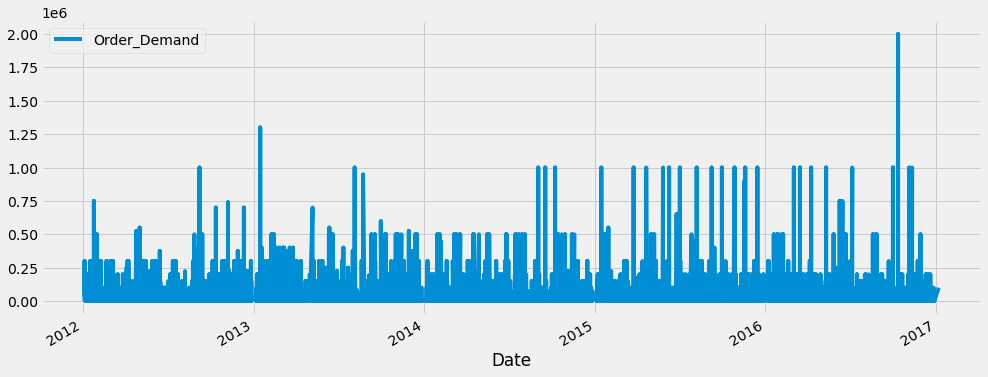

In [45]:
# set the column as the index
y.set_index('Date', inplace=True)

y.plot(figsize=(15, 6))
plt.show()

In [46]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [47]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2282470807.985952
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:426967.9459391644
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:436793.61013670545
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:425197.7991765716
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:426624.45944843953
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:425147.368623642
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:429793.7167765385
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:425032.221125375
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:425893.39922133373
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:425174.81965195126
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:433550.74456010916
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:425990.3160446844
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:425124.8477661349
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:424132.5213680772
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:429567.96914624696
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:425918.834795171
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2589603846.105306
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:430086.70307527774
ARIMA(

In [69]:
#The output of our code suggests that SARIMAX(0, 0, 0)x(0, 0, 0, 12) yields the lowest AIC
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1078      0.005     20.873      0.000       0.098       0.118
ma.L1         -0.8865      0.004   -248.253      0.000      -0.893      -0.879
ar.S.L12      -0.0331      0.005     -6.801      0.000      -0.043      -0.024
ma.S.L12      -0.9901      0.002   -497.878      0.000      -0.994      -0.986
sigma2      8.892e+09   2.07e-13   4.29e+22      0.000    8.89e+09    8.89e+09


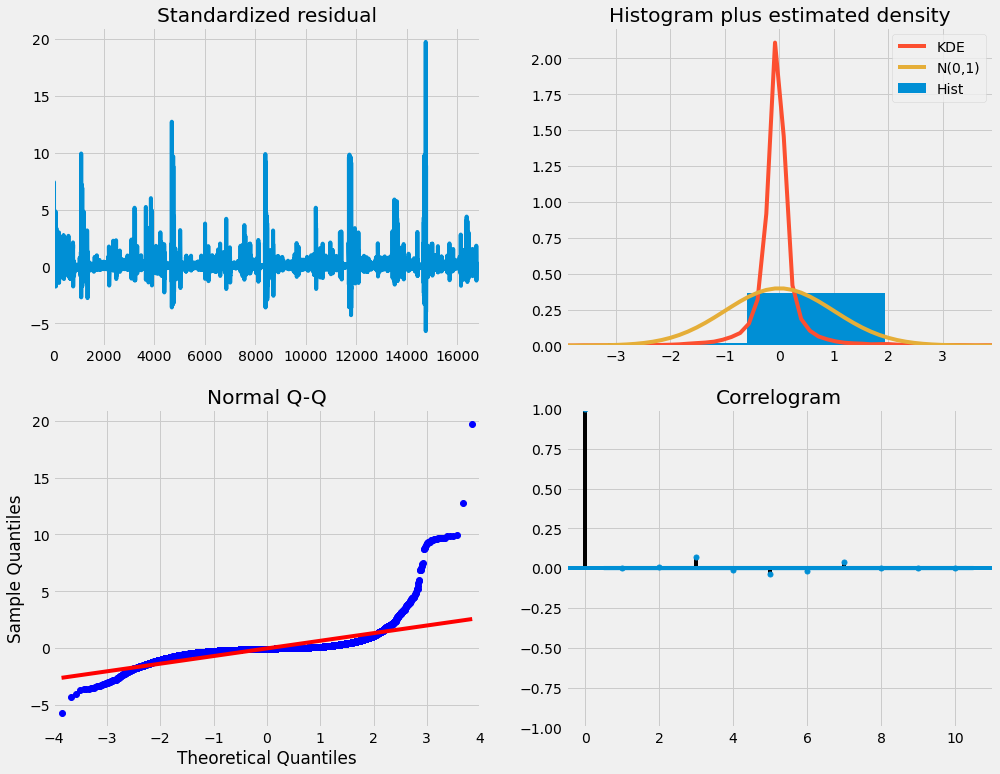

In [70]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [71]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-03'), dynamic=False)
pred_ci = pred.conf_int()

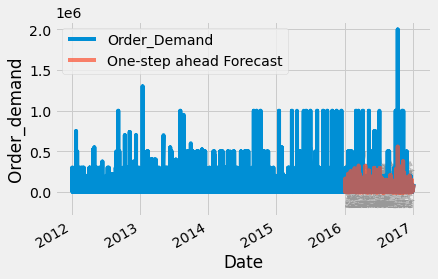

In [72]:
ax = y['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Order_demand')
plt.legend()

plt.show()

In [85]:
#Get accuracy
y_forecasted = pred.predicted_mean
y_forecasted

Date
2016-10-03    15552.878951
2016-10-05    20102.618622
2016-10-19    16634.380247
2016-10-24    13313.847958
2016-10-27     9132.254726
                  ...     
2016-10-03     8706.108501
2016-09-16    14791.283057
2016-11-01    17404.551896
2016-12-01    10243.471663
2016-12-09    11195.394480
Length: 2796, dtype: float64

In [86]:
y_truth = y['2016-10-03':]
y_truth

,Order_Demand
Date,
2016-10-04,25000
2016-10-04,25000
2016-10-11,10000
2016-10-25,25000
2016-11-01,25000
...,...
2016-11-24,3000
2016-10-03,20000
2016-11-01,30000


In [94]:
# Compute the mean square error
mse = ((y_forecasted.values - y_truth.values) ** 2)
mse

array([[8.92480961e+07, 2.39843444e+07, 6.99835938e+07, ...,
        5.76908319e+07, 2.17755129e+08, 1.90567134e+08],
       [8.92480961e+07, 2.39843444e+07, 6.99835938e+07, ...,
        5.76908319e+07, 2.17755129e+08, 1.90567134e+08],
       [3.08344646e+07, 1.02062903e+08, 4.40150013e+07, ...,
        5.48273888e+07, 5.92784505e+04, 1.42896796e+06],
       ...,
       [2.08719307e+08, 9.79581582e+07, 1.78639791e+08, ...,
        1.58645313e+08, 3.90320412e+08, 3.53613189e+08],
       [1.97768856e+07, 1.05305815e+04, 1.13273963e+07, ...,
        6.73635086e+06, 9.51898452e+07, 7.75210784e+07],
       [1.97768856e+07, 1.05305815e+04, 1.13273963e+07, ...,
        6.73635086e+06, 9.51898452e+07, 7.75210784e+07]])

In [92]:
rounded = [np.round(x) for x in mse]
rounded

[array([8.92480960e+07, 2.39843440e+07, 6.99835940e+07, ...,
        5.76908320e+07, 2.17755129e+08, 1.90567134e+08]),
 array([8.92480960e+07, 2.39843440e+07, 6.99835940e+07, ...,
        5.76908320e+07, 2.17755129e+08, 1.90567134e+08]),
 array([3.08344650e+07, 1.02062903e+08, 4.40150010e+07, ...,
        5.48273890e+07, 5.92780000e+04, 1.42896800e+06]),
 array([8.92480960e+07, 2.39843440e+07, 6.99835940e+07, ...,
        5.76908320e+07, 2.17755129e+08, 1.90567134e+08]),
 array([8.92480960e+07, 2.39843440e+07, 6.99835940e+07, ...,
        5.76908320e+07, 2.17755129e+08, 1.90567134e+08]),
 array([1.19786723e+10, 1.10034606e+10, 1.17431075e+10, ...,
        1.15767805e+10, 1.31690608e+10, 1.29514882e+10]),
 array([1.57574770e+08, 2.92499564e+08, 1.85896325e+08, ...,
        2.07491115e+08, 5.24678820e+07, 6.71644910e+07]),
 array([3.08344650e+07, 1.02062903e+08, 4.40150010e+07, ...,
        5.48273890e+07, 5.92780000e+04, 1.42896800e+06]),
 array([8.92480960e+07, 2.39843440e+07, 6.998359

In [96]:
mse.mean()

11886471286.58235